# Make figure 5 of the paper
References:
- Plotting the plate boundaries: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GC000252

In [3]:
import fitz
import pandas as pd
import pygmt
from pyproj import Transformer
import tempfile

import numpy as np

import requests
import json
from scipy.stats import gaussian_kde

import pygmt
import tempfile

## Figure 5(a)

In [5]:
method = 'reloc'
year = 'all_regions'
version = 'ver3'
# Load the catalogs 
matched_events_mycatalog2morton= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/matched_events_with_morton_mycatalog_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
unmatched_events_mycatalog2morton_and_anss= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/new_events_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
# new_events_filtered = pd.read_csv(f'../data/datasets_{year}/new_events_filtered_{year}.csv')
unmatched_events_morton2mycatalog= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/missing_events_from_mycatalog_morton_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
matched_events_morton2mycatalog= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/matched_events_with_mycatalog_morton_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
unmatched_events_anss2mycatalog = pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/missing_events_from_mycatalog_anss_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
matched_events_mycatalog2anss= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/matched_events_with_anss_mycatalog_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')
matched_events_anss2mycatalog= pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/matched_events_with_mycatalog_anss_{method}_cog_{version}_cc_p_4_s_4_rms_2_5.csv')

anss_events = pd.read_csv(f'/wd1/hbito_data/data/datasets_anss/anss_2010-15.csv')

In [6]:
print(len(matched_events_mycatalog2morton)+len(unmatched_events_mycatalog2morton_and_anss)+len(matched_events_mycatalog2anss))


32017


In [7]:
len(matched_events_mycatalog2morton)

3099

In [8]:
### Make tremor contours 
url = 'https://tremorapi.pnsn.org/api/v3.0/events?starttime=2009-08-06T00:00:00&endtime=2025-05-02T23:59:59&format=json'
r = requests.get(url)
def read_geojson(filepath):
    """Reads a GeoJSON file and returns the data as a Python dictionary."""
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data


In [9]:
# Example usage:
filepath = '/wd1/hbito_data/data/datasets_all_regions/pnsn_tremor.json' # Replace with your actual file path
geojson_data = read_geojson(filepath)
# get list of lats and lons
geojson_data['features'][0]['geometry']
tremor_lons = []
tremor_lats = []
for i,f in enumerate(geojson_data['features']):
    tremor_lons.append(f['geometry']['coordinates'][0])
    tremor_lats.append(f['geometry']['coordinates'][1])
xy = np.vstack([tremor_lons,tremor_lats]) 
kde = gaussian_kde(xy, bw_method=0.1)  # You can adjust bw_method

In [10]:
# Create grid for evaluation
xgrid = np.arange(min(tremor_lons), max(tremor_lons),0.2)
ygrid = np.arange(min(tremor_lats), max(tremor_lats),0.2)
X, Y = np.meshgrid(xgrid, ygrid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 1684 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5086 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5113 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Your data array row 17 contains NaNs - no resampling taken place!
/tmp/ipykernel_1137614/1174661458.py:27: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_mycatalog2morton_and_anss['longitude'], y=unmatched_events_mycatalog2morton_and_anss["latitude"],
/tmp/ipykernel_1137614/1174661458.py:29: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use '

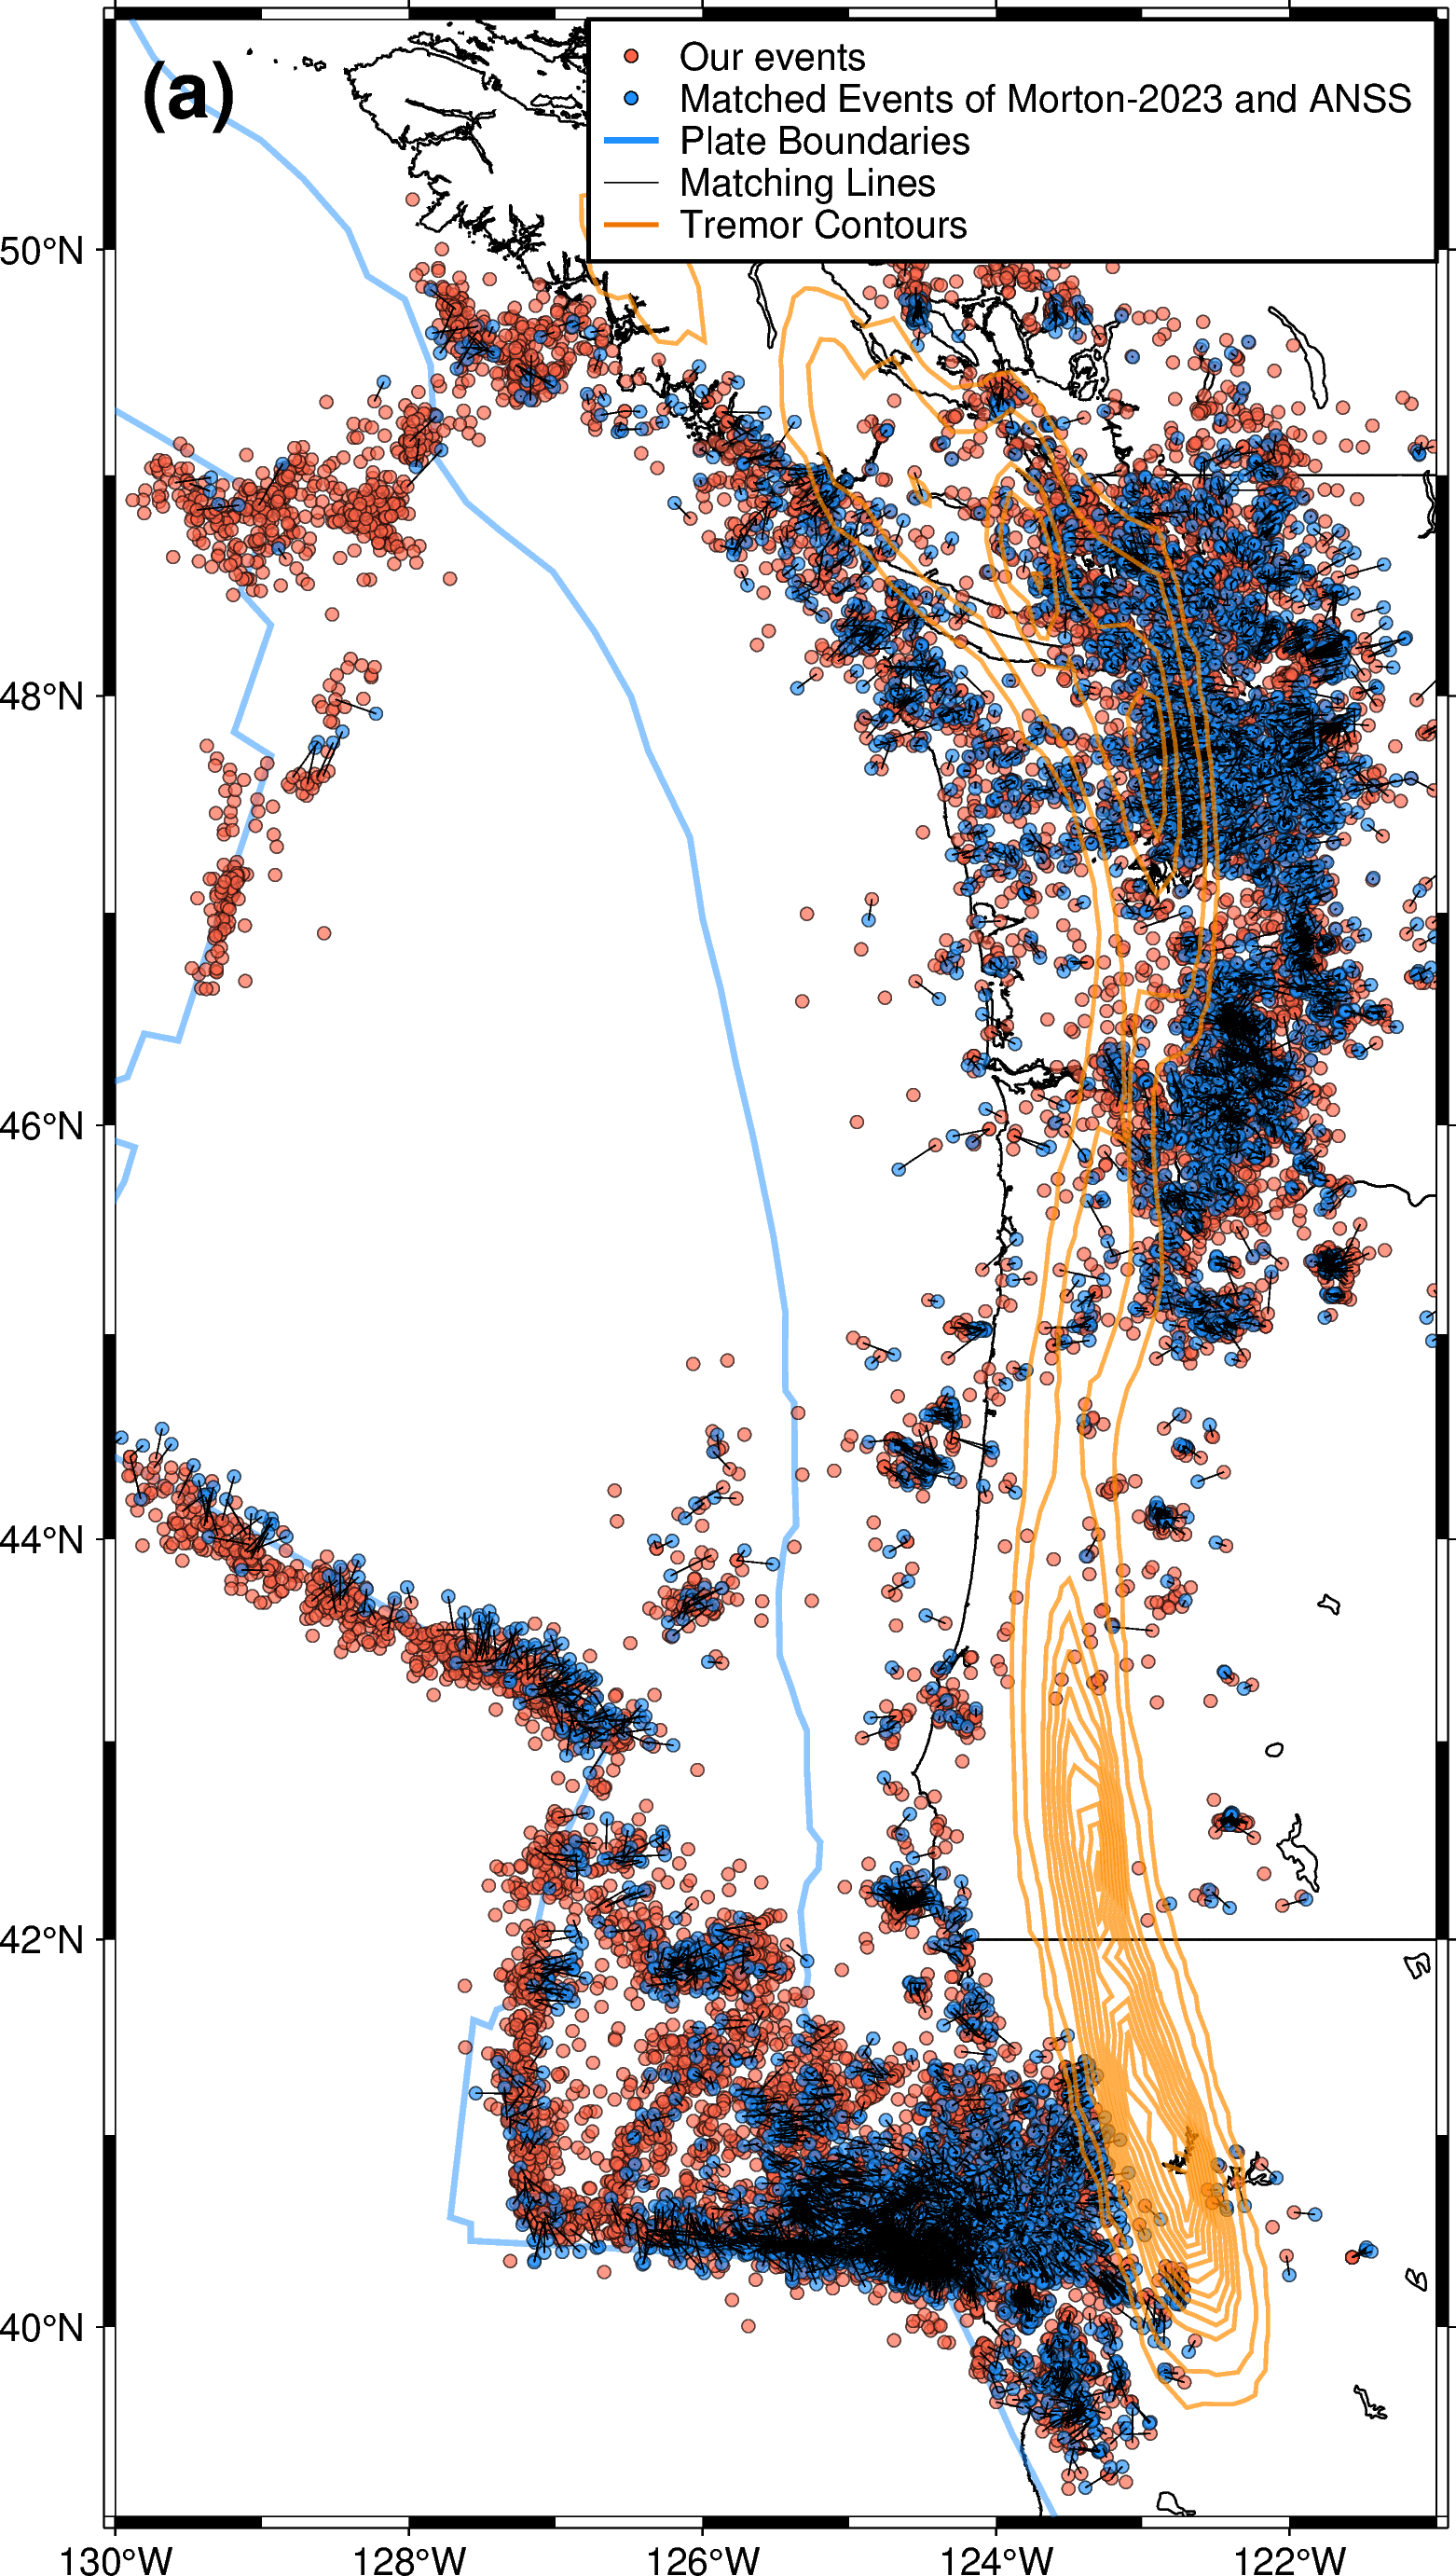

In [13]:
fig = pygmt.Figure()

# Define target region
min_lat = 39
max_lat = 51
min_lon = -130
max_lon = -121

# Define the region to plot
region = [min_lon, max_lon, min_lat, max_lat]
title = "(a)"

# Set up the base map
fig.basemap(region=region, projection="M12c", frame="af")

# Plot the coastlines and political boundaries
fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# Add plate boundaries 
fig.plot(data="/wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)



# Plot the matching events
# fig.plot(x=unmatched_events_anss2mycatalog['longitude'], y=unmatched_events_anss2mycatalog['latitude'],  
#          style="c0.12c", color='#F0E442', pen="black",  transparency=20)
fig.plot(x=unmatched_events_mycatalog2morton_and_anss['longitude'], y=unmatched_events_mycatalog2morton_and_anss["latitude"],  
         style="c0.12c", color='tomato', pen="black",  transparency=35)
fig.plot(x=matched_events_mycatalog2morton['longitude'], y=matched_events_mycatalog2morton['latitude'],  
         style="c0.12c", color='tomato', pen="black",  transparency=35)
fig.plot(x=matched_events_morton2mycatalog['LON'], y=matched_events_morton2mycatalog['LAT'],  
         style="c0.12c", color='dodgerblue1', pen="black",  transparency=35)
fig.plot(x=matched_events_mycatalog2anss['longitude'], y=matched_events_mycatalog2anss["latitude"],  
         style="c0.12c", color='tomato', pen="black",  transparency=35)
fig.plot(x=matched_events_anss2mycatalog['longitude'], y=matched_events_anss2mycatalog['latitude'],  
         style="c0.12c", color='dodgerblue1', pen="black",  transparency=35)
# fig.plot(x=unmatched_events_morton2mycatalog['LON'], y=unmatched_events_morton2mycatalog["LAT"],  
#          style="c0.12c", color='#F0E442', pen="black",  transparency=20)
# # Plot lines between matched events
for i in range(len(matched_events_mycatalog2morton)):
    fig.plot(
        x=[matched_events_morton2mycatalog.iloc[i]['LON'], matched_events_mycatalog2morton.iloc[i]['longitude']],
        y=[matched_events_morton2mycatalog.iloc[i]['LAT'], matched_events_mycatalog2morton.iloc[i]['latitude']],
        pen="0.3p,black"
    )
    
for i in range(len(matched_events_mycatalog2anss)):
    fig.plot(
        x=[matched_events_anss2mycatalog.iloc[i]['longitude'], matched_events_mycatalog2anss.iloc[i]['longitude']],
        y=[matched_events_anss2mycatalog.iloc[i]['latitude'], matched_events_mycatalog2anss.iloc[i]['latitude']],
        pen="0.3p,black"
    )
fig.contour(
    x=X.ravel(),
    y=Y.ravel(),
    z=Z.ravel(),
    levels='0.025,0.05,0.75,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325', pen='1.0p,darkorange',transparency=30  # Contour levels
)
fig.text(x=-129.5, y=50.7, text=title, font="20p,Helvetica-Bold,black", no_clip=True)

# Plot dummy data for the legend
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="tomato", pen="black", transparency=35,
    label="Our events"
)
fig.plot(
    x=[-129.5+120], y=[50.7-30],
    style="c0.12c", color="dodgerblue1", pen="black", transparency=35,
    label="Matched Events of Morton-2023 and ANSS"
)
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="darkblue", pen="black", transparency=20,
#     label="Matched Events of ANSS"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#F0E442", pen="black", transparency=20,
#     label="Unmatched events of Morton-2023 and ANSS"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#F0E442", pen="black", transparency=20,
#     label="Unmatched events of ANSS"
# )
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="1.5p,dodgerblue1",label='Plate Boundaries',transparency=50
    )
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="0.3p,black",label='Matching Lines'
    )
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen='1.0p,darkorange2',label='Tremor Contours',transparency=50
    )



# Add a legend for the pick scale to the plot
fig.legend(position="JTR+w7.7+jTR", box='+gwhite+p1p')

# Save the figure
fig.savefig(f"/wd1/hbito_data/data/datasets_{year}/matched_events_{year}_reloc_cog_ver3_cc_p_4_s_4_rms_2_5_no_relief_tremor_contours.pdf")

# Display the figure
fig.show()


In [1]:
# import pygmt
# import tempfile

# fig = pygmt.Figure()

# # Define target region
# min_lat = 39
# max_lat = 51
# min_lon = -130
# max_lon = -121

# # Define the region to plot
# region = [min_lon, max_lon, min_lat, max_lat]
# title = "(a)"

# # Set up the base map
# fig.basemap(region=region, projection="M12c", frame="af")

# # Plot the coastlines and political boundaries
# fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# # Add plate boundaries 
# fig.plot(data="PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)



# # Plot the matching events
# fig.plot(x=unmatched_events_anss2mycatalog['longitude'], y=unmatched_events_anss2mycatalog['latitude'],  
#          style="c0.12c", color='#F0E442', pen="black",  transparency=20)
# fig.plot(x=matched_events_mycatalog2morton['longitude'], y=matched_events_mycatalog2morton['latitude'],  
#          style="c0.12c", color='#CC79A7', pen="black",  transparency=20)
# fig.plot(x=matched_events_morton2mycatalog['LON'], y=matched_events_morton2mycatalog['LAT'],  
#          style="c0.12c", color='#E69F00', pen="black",  transparency=20)
# fig.plot(x=matched_events_mycatalog2anss['longitude'], y=matched_events_mycatalog2anss["latitude"],  
#          style="c0.12c", color='#CC79A7', pen="black",  transparency=20)
# fig.plot(x=matched_events_anss2mycatalog['longitude'], y=matched_events_anss2mycatalog['latitude'],  
#          style="c0.12c", color='#0072B2', pen="black",  transparency=20)
# fig.plot(x=unmatched_events_morton2mycatalog['LON'], y=unmatched_events_morton2mycatalog["LAT"],  
#          style="c0.12c", color='#009E73', pen="black",  transparency=20)
# # # Plot lines between matched events
# for i in range(len(matched_events_mycatalog2morton)):
#     fig.plot(
#         x=[matched_events_morton2mycatalog.iloc[i]['LON'], matched_events_mycatalog2morton.iloc[i]['longitude']],
#         y=[matched_events_morton2mycatalog.iloc[i]['LAT'], matched_events_mycatalog2morton.iloc[i]['latitude']],
#         pen="0.3p,black"
#     )
    
# for i in range(len(matched_events_mycatalog2anss)):
#     fig.plot(
#         x=[matched_events_anss2mycatalog.iloc[i]['longitude'], matched_events_mycatalog2anss.iloc[i]['longitude']],
#         y=[matched_events_anss2mycatalog.iloc[i]['latitude'], matched_events_mycatalog2anss.iloc[i]['latitude']],
#         pen="0.3p,black"
#     )
# fig.contour(
#     x=X.ravel(),
#     y=Y.ravel(),
#     z=Z.ravel(),
#     levels='0.025,0.05,0.75,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325', pen='1.0p,darkorange2',transparency=50  # Contour levels
# )
# fig.text(x=-129.5, y=50.7, text=title, font="20p,Helvetica-Bold,black", no_clip=True)

# # Plot dummy data for the legend
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#CC79A7", pen="black", transparency=20,
#     label="Our events"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#E69F00", pen="black", transparency=20,
#     label="Matched Events of Morton-2023"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#0072B2", pen="black", transparency=20,
#     label="Matched Events of ANSS"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#009E73", pen="black", transparency=20,
#     label="Unmatched events of Morton-2023"
# )
# fig.plot(
#     x=[-129.5+120], y=[50.7-30],
#     style="c0.12c", color="#F0E442", pen="black", transparency=20,
#     label="Unmatched events of ANSS"
# )
# fig.plot(
#         x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
#         y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
#         pen="1.5p,dodgerblue1",label='Plate Boundaries',transparency=50
#     )
# fig.plot(
#         x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
#         y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
#         pen="0.3p,black",label='Matching Lines'
#     )
# fig.plot(
#         x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
#         y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
#         pen='1.0p,darkorange2',label='Tremor Contours',transparency=50
#     )



# # Add a legend for the pick scale to the plot
# fig.legend(position="JTR+w6.5+jTR", box='+gwhite+p1p')

# # Save the figure
# fig.savefig(f"../data/datasets_{year}/matched_events_{year}_reloc_cog_morton_ver3_p_4_s_4_rms_2_5_no_relief_tremor_contours.pdf")

# # Display the figure
# fig.show()


## Figure 5(b)

In [14]:
df = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/origin_2010_2015_reloc_cog_ver3_cc.csv',index_col=0)
df


lat        lon    depth          time   orid  nass  p_picks  \
0        47.13396 -122.09098  60.1470  1.262305e+09      0     7        2   
7        48.17742 -121.83289   6.1630  1.262305e+09      1    55       25   
62       47.85353 -122.12435  18.2960  1.262330e+09      2    28       10   
90       47.97665 -122.90617  20.9100  1.262336e+09      3    20       10   
110      45.86019 -122.19002   8.4035  1.262362e+09      4    39       20   
...           ...        ...      ...           ...    ...   ...      ...   
1004270  40.59877 -124.40572  20.4825  1.435097e+09  63882    23        9   
1004293  40.62611 -127.11445  18.5140  1.435100e+09  63883    12        1   
1004305  49.76714 -124.52950   3.6850  1.435101e+09  63884    13        7   
1004318  40.66547 -125.33902   3.0525  1.435101e+09  63885     8        3   
1004326  43.33308 -127.31240   6.0615  1.435101e+09  63886     9        4   

         s_picks    rms  nsphz         gap algorithm  
0              5  1.081    5.0  243.895048     genie  
7             30  0.985   30.0  197.622556     genie  
62            18  0.784   18.0  179.587425     genie  
90            10  0.465   10.0  153.822127     genie  
110           19  0.657   19.0  238.225383     genie  
...          ...    ...    ...         ...       ...  
1004270       14  1.015   14.0   77.202555     genie  
1004293       11  0.744   11.0  221.215338     genie  
1004305        6  0.894    6.0  205.239215     genie  
1004318        5  0.982    5.0  141.141631     genie  
1004326        5  0.447    5.0  246.361956     genie  

[63887 rows x 12 columns]

In [15]:
_df = df[(df.rms < 2.5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('nass', ascending=True)


plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 1684 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5086 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5113 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Your data array row 17 contains NaNs - no resampling taken place!
/tmp/ipykernel_1137614/250144894.py:35: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(
/tmp/ipykernel_1137614/250144894.py:54: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")


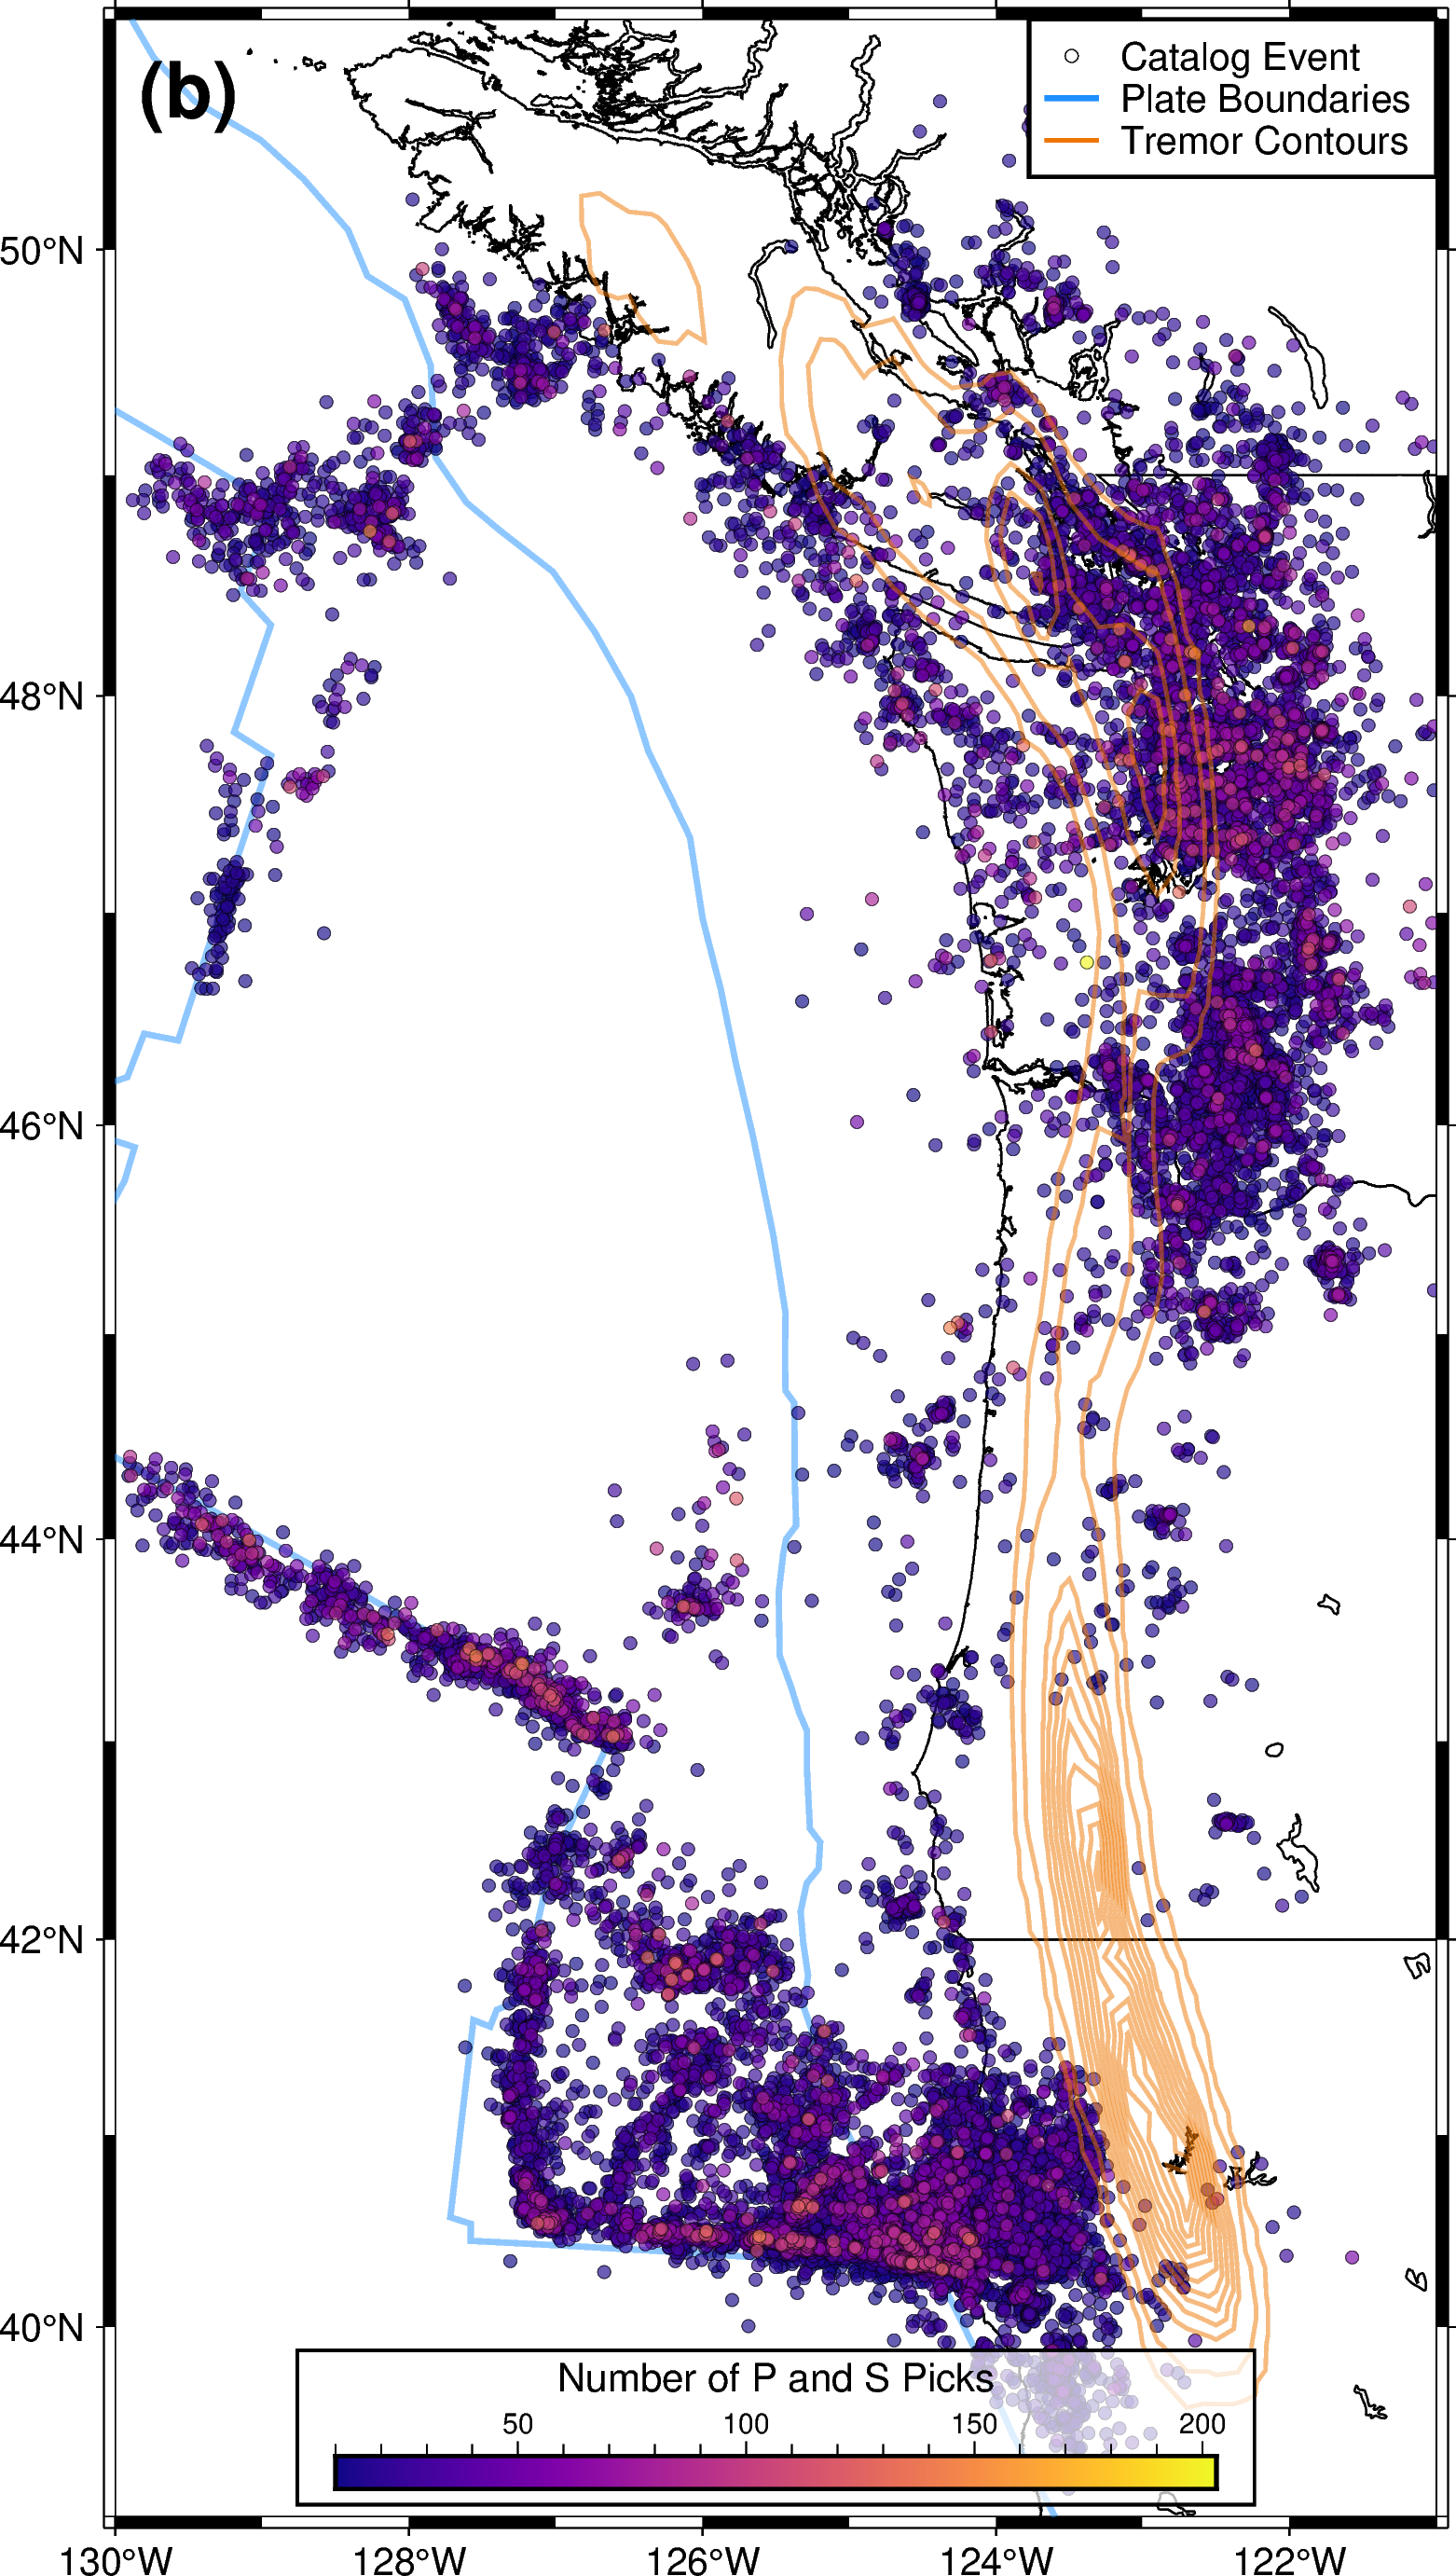

In [17]:


# Initialize the figure
fig = pygmt.Figure()

# Define target region
min_lat = 39
max_lat = 51
min_lon = -130
max_lon = -121

# Define the region to plot
region = [min_lon, max_lon, min_lat, max_lat]
title = "(b)"


# Load grid data
# Set up the base map
fig.basemap(region=region, projection="M12c", frame="af")

# Plot the coastlines and political boundaries
fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# Add plate boundaries 
fig.plot(data="/wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)



# Apply logarithmic scale for color mapping
# Apply log10 transformation to nass values and set color palette
nass_log_min = _df['nass'].min()  # Add 1 to avoid log(0) error
nass_log_max = _df['nass'].max()
pygmt.makecpt(cmap="plasma", series=[nass_log_min, nass_log_max])
title = "(b)"

# Plot the stations with the color map applied to the logarithm of "nass"
fig.plot(
    x=_df["lon"],
    y=_df["lat"],
    style="c0.12c",
    color=_df["nass"],  # Apply log transformation for color mapping
    cmap=True,
    pen="0.1p,black",
    transparency=35
)


fig.contour(
    x=X.ravel(),
    y=Y.ravel(),
    z=Z.ravel(),
    levels='0.025,0.05,0.75,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325', pen='1.0p,darkorange2',transparency=50  # Contour levels
)

# Plot a dummy objects for the legend
fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")

fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen="1.5p,dodgerblue1",label='Plate Boundaries'
    )
fig.plot(
        x=[matched_events_anss2mycatalog.iloc[0]['longitude']+120, matched_events_mycatalog2anss.iloc[0]['longitude']+120],
        y=[matched_events_anss2mycatalog.iloc[0]['latitude']-30, matched_events_mycatalog2anss.iloc[0]['latitude']-30],
        pen='1.0p,darkorange2',label='Tremor Contours',transparency=50
    )
fig.text(
    x=-129.5, y=50.7, text=title,
    font="20p,Helvetica-Bold,black",
    no_clip=True    # This prevents the text from being clipped
)

# Add title text
fig.colorbar(
    position="jBC+o0.0c/0.25c+h+w8c/0.3c+ml",
    box="+gwhite@30+p0.8p,black",
    frame=["x+lNumber of P and S Picks"],
)

# Add the legend to the plot
fig.legend(position="JTR+w3.7+jTR", box='+gwhite+p1p')
# Save the figure
fig.savefig("/wd1/hbito_data/data/datasets_all_regions/all_catalog_events_2010_2015_ver3_cc_nass_no_relief_tremor_contours.pdf")

# Display the figure
fig.show()


## Combine two figures

In [18]:

# Load the two existing PyGMT PDFs
doc1 = fitz.open(f"/wd1/hbito_data/data/datasets_{year}/matched_events_{year}_reloc_cog_ver3_cc_p_4_s_4_rms_2_5_no_relief_tremor_contours.pdf")
doc2 = fitz.open(f"/wd1/hbito_data/data/datasets_{year}/all_catalog_events_2010_2015_ver3_cc_nass_no_relief_tremor_contours.pdf")

# Create a new empty PDF to hold the combined plot
combined = fitz.open()

# Get dimensions of both plots
rect1 = doc1[0].rect
rect2 = doc2[0].rect

# Determine combined width and max height
combined_width = rect1.width + rect2.width
combined_height = max(rect1.height, rect2.height)

# Create a new blank page with combined size
page = combined.new_page(width=combined_width, height=combined_height)

# Paste the first plot on the left
page.show_pdf_page(rect1, doc1, 0)

# Paste the second plot to the right of the first
right_rect = fitz.Rect(rect1.width, 0, combined_width, rect2.height)
page.show_pdf_page(right_rect, doc2, 0)

# Save the combined PDF
combined.save("/wd1/hbito_data/data/datasets_all_regions/fig4_cc_no_relief_tremor_contours.pdf")

In [20]:
# Load the PDF
doc = fitz.open("/wd1/hbito_data/data/datasets_all_regions/fig4_cc_no_relief_tremor_contours.pdf")

# Set zoom factor or resolution
zoom = 4  # 4x means ~300+ DPI depending on original figure size
mat = fitz.Matrix(zoom, zoom)

# Render the first page to a high-res pixmap
pix = doc[0].get_pixmap(matrix=mat, alpha=False)

# Save to PNG
pix.save("/wd1/hbito_data/data/datasets_all_regions/fig4_cc_no_relief_tremor_contours.png")